#### Universidade Federal de Campina Grande
#### Departamento de Sistemas e Computação
#### Lucas Nascimento Cabral
#### Previsão de Eleição de Deputados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
treino = pd.read_csv("train.csv")
teste = pd.read_csv("test.csv")

# treino.head()

Atributos desnecessários como sequencial_candidato, media_receita, media_despesas e nome podem ser removidos.

In [3]:
treino = treino.drop(columns=['sequencial_candidato','media_receita','media_despesa','nome'])
teste = teste.drop(columns=['sequencial_candidato','media_receita','media_despesa','nome'])

Aplicando normalização em todas as variáveis numéricas, exceto ano, por ser considerada como ordinal

In [4]:
treino = treino.fillna(treino.mean())

numeric_feats = treino.dtypes[treino.dtypes != "object"].index

treino[numeric_feats] = np.log1p(treino[numeric_feats])

treino_X = treino.loc[:,:'ocupacao']
treino_Y = treino.situacao

treino_X = pd.get_dummies(treino_X)

#### (1) Há desbalanceamento das classes (isto é, uma classe tem muito mais instâncias que outra)? Em que proporção? Quais efeitos colaterais o desbalanceamento de classes pode causar no classificador? Como você poderia tratar isso? 

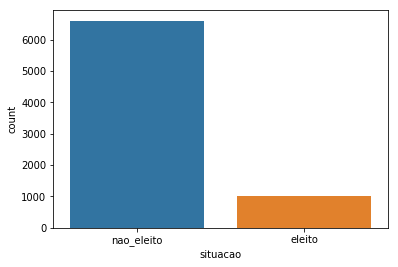

In [5]:
sns.countplot(treino_Y)

Como podemos observar em nosso conjunto de treino existe o desbalanceamento muito grande na quantidade de instâncias de cada classe, chegando a proporção de X casos de nao_eleito para cada um caso de eleito. Esse desbalanceamento pode levar nossos algoritmos de aprendizado de máquina a não conseguirem obter classificadores satisfatórios, porque apesar dos exemplos das classes majoritárias (de maior proporção) serem classificados corretamente com grande frequência, normalmente os exemplos das
classes minoritárias (de menor proporção) não são classificados corretamente.

Para resolver esse problema utilizamos técnicas de Under-sampling, neste laboratório vou utilizar Cluster Centroids. Essa técnica realiza subamostragem gerando centróides com base em métodos de agrupamento. Os dados serão previamente agrupados por semelhança, a fim de preservar a informação.

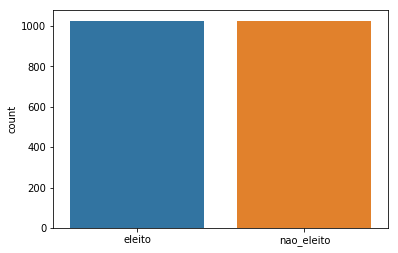

In [6]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids()
x_cc, y_cc = cc.fit_sample(treino_X, treino_Y)
y_cc = y_cc[:,np.newaxis]

sns.countplot(y_cc[:,0])